In [50]:
import glob
import tensorflow as tf
from tensorflow.python.ops import control_flow_ops
from tqdm import tqdm
import h5py
import matplotlib.pyplot as plt
I=0
def _parse_function(example_proto):
    print('1')
    features = {"X": tf.FixedLenFeature((3*257), tf.float32),
              "Y": tf.FixedLenFeature((257), tf.float32)}
    parsed_features = tf.parse_single_example(example_proto, features)
    print("i was here")
    print('2')
    return parsed_features["X"], parsed_features["Y"]

def rbm_layer(n_visible, n_hidden, num_epochs, num_cases, lr, ws, bs, layer_n, len_data, directories):
    Data_path = directories[0]
    tfrecord_folder_parent = directories[1]
    tfrecord_folder = directories[2]
    
    tfrecord_path_x = os.path.normpath(os.path.join(Data_path,tfrecord_folder_parent,tfrecord_folder))
    sorted_names_x = natsorted(os.listdir(tfrecord_path_x))
    trainfilenames_x = []
    for i in sorted_names_x:
        trainfilenames_x.append(os.path.normpath(os.path.join(tfrecord_path_x,i)))
#     filenames_x = tf.placeholder(tf.string, shape=[None])
#     dataset_x = tf.data.TFRecordDataset(filenames_x)
    dataset_x = tf.data.TFRecordDataset(trainfilenames_x)
    dataset_x = dataset_x.map(_parse_function)  # Parse the record into tensors.
#     dataset_x = dataset_x.repeat()  # Repeat the input indefinitely.
    dataset_x = dataset_x.batch(num_cases)
#     iterator_x = dataset_x.make_initializable_iterator()
    
    weightcost  = 0.0002
    initialmomentum  = 0.5
    finalmomentum    = 0.9
    momentum  = 0.5
    numcases = 32
    W_adder  = tf.zeros((n_visible,n_hidden),dtype=tf.dtypes.float32)
    bh_adder = tf.zeros((1,n_hidden),dtype=tf.dtypes.float32)
    bv_adder = tf.zeros((1,n_visible),dtype=tf.dtypes.float32)
#     x  = tf.placeholder(tf.float32, [None, n_visible], name="x") #The placeholder variable that holds our data
#     h = tf.placeholder(tf.float32, [None, n_hidden], name="h")
#     h = tf.zeros((numcases, n_hidden),dtype=tf.dtypes.float32)
#     h_empty  = np.zeros_like(h)
#     h_empty = np.zeros((, n_hidden),dtype=np.float32)
#     m  = tf.Variable(0.5, dtype=np.float32, name='m')
    W  = tf.Variable(tf.random_normal([n_visible, n_hidden], 0.01), name="W") #The weight matrix that stores the edge weights
    bh = tf.Variable(tf.zeros([1, n_hidden],  tf.float32, name="bh")) #The bias vector for the hidden layer
    bv = tf.Variable(tf.zeros([1, n_visible],  tf.float32, name="bv")) #The bias vector for the visible layer

    def sample(probs):
        #Takes in a vector of probabilities, and returns a random vector of 0s and 1s sampled from the input vector
        return tf.floor(probs + tf.random_uniform(tf.shape(probs), 0, 1))

#     hk = sample(tf.sigmoid(tf.matmul(x, W) + bh)) #Propagate the visible values to sample the hidden values
#     #128*512

#     #Next, we update the values of W, bh, and bv, based on the difference between the samples that we drew and the original values
#     posprods  = tf.matmul(tf.transpose(x),hk) #771*512
#     poshidacts = tf.reduce_sum(hk) #(512)
#     posvisacts = tf.reduce_sum(x,axis=0)#771
    
#     xk   = tf.sigmoid(tf.matmul(hk, tf.transpose(W)) + bv)#128*711
#     neghidprobs   = tf.sigmoid(tf.matmul(xk, W) + bh) #128*512
#     negprods  = tf.matmul(tf.transpose(xk),neghidprobs); #771*512##################################
#     neghidacts = tf.reduce_sum(neghidprobs, axis=0)
#     negvisacts = tf.reduce_sum(xk, axis=0)
#     print(negvisacts)#771
# #     print(type(posprod-negprod))
# #     print(type(lr))
#     m=0.5
#     print('here')
#     W_adder = (m * W_adder)+ (lr*(posprods-negprods)/numcases)-(weightcost*W)
#     bv_adder = (m * bv_adder)+ ((lr/numcases)*(posvisacts-negvisacts))
#     bh_adder = (m * bh_adder)+ ((lr/numcases)*(poshidacts-neghidacts))
#     #When we do sess.run(updt), TensorFlow will run all 3 update steps
#     updt = [W.assign_add(W_adder), bv.assign_add(bv_adder), bh.assign_add(bh_adder)]

    ### Run the graph!
    # Now it's time to start a session and run the graph! 

#     with tf.Session() as sess:
        #First, we train the model
        #initialize the variables of the model
#         sess.run(tf.global_variables_initializer())
#         print(m)
#         sess.run(iterator_x.initializer, feed_dict={filenames_x: trainfilenames_x})
#         print(iterator_x.get_next()[0])
        #Run through all of the training data num_epochs times
#         for epoch in tqdm(range(num_epochs)):
            #Train the RBM on batch_size examples at a time
#             for X_batch in da(batch_size, layer_n, ws, bs, len_data, name, data_name):
#             Data = sess.run(iterator_x.get_next()[0])
#             print('blah')
#             print(Data.shape)
#             for Data in dataset_x:
#                 for j in range(layer_n):
#                     Data = np.matmul(Data,ws[j])+bs[j]
    #             if epoch>5:
    #                 momentum=finalmomentum;
    #             else:
    #                 momentum=initialmomentum;
#                 feed_dict = {x: Data}
#                 var1 = sess.run(updt, feed_dict)
    count=0
    for epoch in tqdm(range(num_epochs)):
        count+=1
        incount=0
        for x in dataset_x:
            incount+=1
            if incount%100==0:
                plt.imshow(updt[0].numpy(),cmap='gray')
                plt.show()
                print(updt[0])
                print(incount)
            if layer_n>1:
                for j in range(layer_n-1):
                    x = np.matmul(x,ws[j])+bs[j]
            poshidprobs = tf.matmul(x[0], W) + bh #Propagate the visible values to sample the hidden values
            poshidstates = sample(poshidprobs)
            #128*512
            #Next, we update the values of W, bh, and bv, based on the difference between the samples that we drew and the original values
            posprods  = tf.matmul(tf.transpose(x[0]),poshidprobs) #771*512
            poshidacts = tf.reduce_sum(poshidprobs, axis=0) #(512)
            posvisacts = tf.reduce_sum(x[0],axis=0)#771

            negdata   = tf.sigmoid(tf.matmul(poshidstates, tf.transpose(W)) + bv)#128*711
            neghidprobs   = tf.matmul(negdata, W) + bh #128*512
            negprods  = tf.matmul(tf.transpose(negdata),neghidprobs); #771*512##################################
            neghidacts = tf.reduce_sum(neghidprobs, axis=0)
            negvisacts = tf.reduce_sum(negdata, axis=0)
#             print(negvisacts)#771
        #     print(type(posprod-negprod))
        #     print(type(lr))
            if epoch>5:
                m=finalmomentum
            else:
                m=initialmomentum
            W_adder = (m * W_adder)+ (lr*(posprods-negprods)/numcases)-(weightcost*W)
            bv_adder = (m * bv_adder)+ ((lr/numcases)*(posvisacts-negvisacts))
            bh_adder = (m * bh_adder)+ ((lr/numcases)*(poshidacts-neghidacts))
            #When we do sess.run(updt), TensorFlow will run all 3 update steps
            updt = [W.assign_add(W_adder), bv.assign_add(bv_adder), bh.assign_add(bh_adder)] 
            
        print(count)
    return updt




imported
1
i was here
2








  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

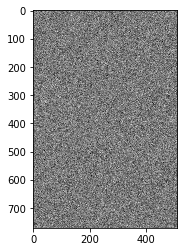

<tf.Variable 'UnreadVariable' shape=(771, 512) dtype=float32, numpy=
array([[-0.08046848, -1.1446408 ,  2.257247  , ...,  0.05552264,
         0.01290544,  1.1578337 ],
       [-2.6890302 , -0.31221315,  0.95728654, ...,  1.1558441 ,
        -2.443432  , -1.030288  ],
       [ 0.71958613, -0.04884455,  0.23755896, ..., -0.39367726,
         0.6827691 ,  0.02524314],
       ...,
       [ 0.6643882 , -0.02972319,  0.4310838 , ...,  0.60370034,
        -1.1433917 , -0.21302189],
       [-0.6077545 ,  1.5422816 ,  0.17255498, ...,  1.5985143 ,
         0.7538506 , -0.51830065],
       [ 0.41846946, -0.11182618,  0.21815659, ..., -0.3842923 ,
         1.4918902 , -0.07416483]], dtype=float32)>
100


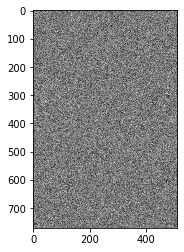

<tf.Variable 'UnreadVariable' shape=(771, 512) dtype=float32, numpy=
array([[-0.02889136, -1.0467509 ,  2.1146524 , ...,  0.05662265,
         0.05412045,  1.0980518 ],
       [-2.5158746 , -0.2585997 ,  0.8739971 , ...,  1.0966663 ,
        -2.2775147 , -0.9819295 ],
       [ 0.69933933, -0.04100122,  0.22211486, ..., -0.39457327,
         0.6455591 ,  0.03657036],
       ...,
       [ 0.62251604, -0.02565106,  0.37285146, ...,  0.5460459 ,
        -1.0632536 , -0.15277033],
       [-0.5793732 ,  1.4412878 ,  0.16516803, ...,  1.4988348 ,
         0.6849955 , -0.45712936],
       [ 0.38138607, -0.12410892,  0.19095565, ..., -0.36226687,
         1.3692615 , -0.08374203]], dtype=float32)>
200


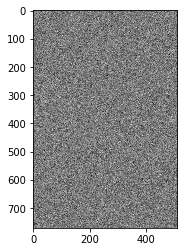

<tf.Variable 'UnreadVariable' shape=(771, 512) dtype=float32, numpy=
array([[-1.82844372e-03, -9.78916585e-01,  1.96526921e+00, ...,
         4.38996740e-02,  7.69061521e-02,  1.03708851e+00],
       [-2.35931492e+00, -2.19467044e-01,  7.99092054e-01, ...,
         1.02277184e+00, -2.13462043e+00, -9.21146870e-01],
       [ 6.97687805e-01, -1.34705929e-02,  2.17422545e-01, ...,
        -3.77217948e-01,  5.98842859e-01,  6.13926761e-02],
       ...,
       [ 5.87503672e-01, -2.58892514e-02,  3.17496002e-01, ...,
         4.80486840e-01, -1.00317943e+00, -1.02507845e-01],
       [-5.49805999e-01,  1.35411549e+00,  1.49665207e-01, ...,
         1.41367209e+00,  6.23984337e-01, -4.01799500e-01],
       [ 3.66498858e-01, -1.18194975e-01,  1.60078108e-01, ...,
        -3.32692415e-01,  1.25816655e+00, -9.32430476e-02]], dtype=float32)>
300


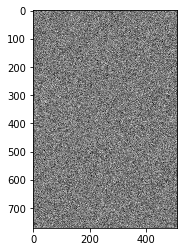

<tf.Variable 'UnreadVariable' shape=(771, 512) dtype=float32, numpy=
array([[ 2.9479424e-02, -8.9765853e-01,  1.8510439e+00, ...,
         6.2168282e-02,  9.0124577e-02,  9.7591299e-01],
       [-2.2163780e+00, -1.8779866e-01,  7.4706471e-01, ...,
         9.7573298e-01, -1.9974129e+00, -8.5832453e-01],
       [ 6.8953210e-01, -4.0611485e-06,  2.2302826e-01, ...,
        -3.5449663e-01,  5.6101435e-01,  7.2879970e-02],
       ...,
       [ 5.5392957e-01, -2.6830178e-02,  2.8864205e-01, ...,
         4.2565197e-01, -9.4059926e-01, -4.4799156e-02],
       [-5.1812935e-01,  1.2777903e+00,  1.3487872e-01, ...,
         1.3304635e+00,  5.6892961e-01, -3.6342606e-01],
       [ 3.4995511e-01, -1.1226827e-01,  1.4023241e-01, ...,
        -3.1398058e-01,  1.1650933e+00, -9.4348229e-02]], dtype=float32)>
400


KeyboardInterrupt: 

In [51]:
# import libraries.
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
import datetime
tf.enable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from pystoi.stoi import stoi
import h5py
######################
#import libraries.
import matplotlib.pyplot as plt
from tabulate import tabulate
import time
import os
import librosa
from librosa.core import stft, istft
####import sounddevice as sd
import time
print('imported')
# #######################
Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
# Data_path = os.getcwd()
tfrecord_folder_parent = 'tfrecord_files'
tfrecord_folder = 'tfrecord_files_10h_norm'
tfrecord_val_folder = 'validation_10h'
# ckpt_folder = '3'
dirs = [Data_path, tfrecord_folder_parent, tfrecord_folder]
 
# len_data = (684108, 257)
len_data = (2197278, 257)
val_len = (97278,257)
w=3
#######################
#define reconstruct function to reconstruct sound from framed signal.
def reconstruct(wave,angle):
    recon = np.sqrt(np.power(10, wave))
    recon1 = recon*np.cos(angle)+recon*np.sin(angle)*1j
    recon = librosa.core.istft((recon1.T), hop_length=200, win_length=500, window='hann')
    return recon
#######################
I=0
global batch_size
batch_size = 128
# epochs_num=50
global datalen
datalen=len_data[0]

h = [512,512]
seed = 7
rate1 = 0.1
rate2 = 0.2
from tensorflow.keras.layers import Activation
# from keras.layers import Activation
np.random.seed(seed)
model = Sequential()
act1 = layers.LeakyReLU(alpha=0.1)
model.add(layers.Dropout(rate1, noise_shape=None, seed=None))
# ,kernel_regularizer=regularizers.l2(0.001)
model.add(Dense(h[0], input_dim = w*len_data[1]))
model.add(BatchNormalization())
model.add(act1)
# model.add(Activation('sigmoid'))
act2=layers.LeakyReLU(alpha=0.1)
model.add(layers.Dropout(rate2, noise_shape=None, seed=None))
model.add(Dense(h[1]))
model.add(act2)
# act3=layers.LeakyReLU(alpha=0.1)
# # model.add(layers.Dropout(rate, noise_shape=None, seed=None))
# model.add(Dense(h[2]))
# model.add(act3)
act=layers.LeakyReLU(alpha=0.01)
model.add(Dense(len_data[1]))
#############################################
import os
from natsort import natsorted

# def _parse_function(example_proto):
#     features = {"X": tf.FixedLenFeature((3*257), tf.float32),
#               "Y": tf.FixedLenFeature((257), tf.float32)}
#     parsed_features = tf.parse_single_example(example_proto, features)
#     return parsed_features["X"], parsed_features["Y"]

# tfrecord_path = os.path.normpath(os.path.join(Data_path,tfrecord_folder_parent,tfrecord_folder))
# sorted_names = natsorted(os.listdir(tfrecord_path))
# trainfilenames = []
# for i in sorted_names:
#     trainfilenames.append(os.path.normpath(os.path.join(tfrecord_path,i)))
# filenames = tf.placeholder(tf.string, shape=[None])
# dataset = tf.data.TFRecordDataset(filenames)
# dataset = dataset.map(_parse_function)  # Parse the record into tensors.
# dataset = dataset.repeat()  # Repeat the input indefinitely.
# dataset = dataset.batch(batch_size)
# iterator = dataset.make_initializable_iterator()

# # orig_path = os.getcwd()
# tfrecord_path_x = os.path.normpath(os.path.join(Data_path,tfrecord_folder_parent,tfrecord_folder))
# sorted_names_x = natsorted(os.listdir(tfrecord_path_x))
# trainfilenames_x = []
# for i in sorted_names_x:
#     trainfilenames_x.append(os.path.normpath(os.path.join(tfrecord_path,i)))
# filenames_x = tf.placeholder(tf.string, shape=[None])
# dataset_x = tf.data.TFRecordDataset(filenames_x)
# dataset_x = dataset_x.map(_parse_function)  # Parse the record into tensors.
# dataset_x = dataset_x.repeat()  # Repeat the input indefinitely.
# dataset_x = dataset_x.batch(batch_size)
# iterator_x = dataset_x.make_initializable_iterator()

########################
visible = w*len_data[1]
hidden = h[0]
visible1 = h[0]
hidden1 = h[1]
visible2 = h[1]
hidden2 = len_data[1]

layer1 = rbm_layer(visible, hidden, 1, batch_size, 0.0001, [np.eye(visible,hidden)], [np.zeros((1,visible))], 1, len_data[0],dirs)
# layer2 = rbm_layer(visible1, hidden1, 50, batch_size, 0.01, [np.eye(visible),layer1[0]], [np.zeros((1,visible)),layer1[2]], 2, len_data[0], dirs)
# layer3 = rbm_layer(visible2, hidden2, 50, batch_size, 0.01, [np.eye(visible),layer1[0],layer2[0]], [np.zeros((1,visible)),layer1[2],layer2[2]], 3, len_data[0], dirs)

###############################

# tfrecord_path_val = os.path.normpath(os.path.join(Data_path,tfrecord_folder_parent,tfrecord_val_folder))
# sorted_names_val = natsorted(os.listdir(tfrecord_path_val))
# trainfilenames_val = []
# for i in sorted_names_val:
#     trainfilenames_val.append(os.path.normpath(os.path.join(tfrecord_path_val,i)))
# filenames_val = tf.placeholder(tf.string, shape=[None])
# dataset_val = tf.data.TFRecordDataset(filenames_val)
# dataset_val = dataset_val.map(_parse_function)  # Parse the record into tensors.
# dataset_val = dataset_val.repeat()  # Repeat the input indefinitely.
# dataset_val = dataset_val.batch(128)
# iterator_val = dataset_val.make_initializable_iterator()

# epochs_num = 50
# steps = len_data[0] // batch_size
# val_steps = val_len[0] // batch_size
# # You can feed the initializer with the appropriate filenames for the current
# # phase of execution, e.g. training vs. validation.
# # next_elem = iterator_val.get_next()
# # Initialize `iterator` with training data.

# if not os.path.exists(os.path.join(Data_path,"checkpoints",ckpt_folder)):
#     os.makedirs(os.path.join(Data_path,"checkpoints",ckpt_folder))

# print(datetime.datetime.now())
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     sess.run(iterator.initializer, feed_dict={filenames: trainfilenames})
#     sess.run(iterator_val.initializer, feed_dict={filenames_val: trainfilenames_val})
#     print("initialized")
#     checkpoint_path = os.path.normpath(os.path.join(Data_path,"checkpoints",ckpt_folder,"weights.{epoch:02d}.hdf5"))
#     checkpoint_dir = os.path.dirname(checkpoint_path)

#     cp_callback = tf.keras.callbacks.ModelCheckpoint(
#         checkpoint_path, verbose=1, save_best_only=True, save_weights_only=True)
#         # Save weights, every 5-epochs.
# #         period=1)
#     early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
#     opt = tf.keras.optimizers.Adamax()
# #     opt = tf.train.AdamOptimizer()
# #     opt = tf.keras.optimizers.SGD()
#     model.compile(loss='mean_squared_error', optimizer=opt)
#     history = model.fit( iterator, steps_per_epoch=steps,epochs=epochs_num, callbacks = [cp_callback,early_stop], verbose=1,validation_data=iterator_val,validation_steps=val_steps)
# #     model.save(os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset.h5")))
# #     tf.keras.models.save_model(model, os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset.h5")))
# #     model.save_weights(os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset.h5")))
#     model_json = model.to_json()
#     with open(os.path.normpath(os.path.join(Data_path, 'models', "model_3.json")), "w") as json_file:
#         json_file.write(model_json)
#     # # serialize weights to HDF5
#     model.save_weights(os.path.normpath(os.path.join(Data_path, 'models', "model_3.h5")))
#     print("Saved model to disk")
    
# print(datetime.datetime.now())
# %matplotlib inline
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()
# plt.savefig(os.path.normpath(os.path.join(Data_path,'images',ckpt_folder+'.png')))
# # model_json = model.to_json()
# # with open("model_10h_dataset.json", "w") as json_file:
# #     json_file.write(model_json)
# # model.save_weights("model_10h_dataset.h5")
# # print("Saved model to disk")


In [ ]:
updt[0]

In [27]:
write_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff/10hdata'
mixed_folder = os.path.normpath(os.path.join(write_path,'ftr_refrmd_10h_norm'))
h5f = h5py.File(mixed_folder+'.hdf5','r')
ftr = h5f['ftr_refrmd_10h_norm'][-100:]
h5f.close()

In [28]:
hidden1 = np.matmul(ftr,layer1[0].numpy())+layer1[2].numpy()
# hidden2 = np.matmul(hidden1,layer2[0])+layer2[2]
# hidden3 = np.matmul(hidden2,layer3[0])+layer3[2]
hidden1_b = np.matmul(hidden1,layer1[0].numpy().T)+layer1[1].numpy()
# hidden2_b = np.matmul(hidden3_b,layer2[0].T)+layer2[1]
# hidden1_b = np.matmul(hidden2_b,layer1[0].T)+layer1[1]

In [29]:
layer1[0]

<tf.Variable 'UnreadVariable' shape=(771, 512) dtype=float32, numpy=
array([[-0.00352038, -0.00238421, -0.00786775, ..., -0.00410136,
        -0.0057996 , -0.01138258],
       [-0.00338426, -0.00042559, -0.0107429 , ..., -0.00094086,
        -0.00913447, -0.01579316],
       [-0.00232148, -0.00873642, -0.01133458, ..., -0.00179248,
        -0.01204568, -0.01617649],
       ...,
       [-0.00920212,  0.00462373, -0.00413473, ...,  0.02565577,
         0.00052462, -0.0003129 ],
       [-0.01055487,  0.00452308, -0.00454413, ...,  0.02484809,
         0.00083706, -0.0003019 ],
       [-0.00927059,  0.00444982, -0.00408371, ...,  0.02251523,
         0.00200555,  0.00092491]], dtype=float32)>

In [30]:
ftr

array([[ 0.4885952 ,  0.3221456 , -1.2588663 , ..., -0.84370476,
        -0.11204042,  0.18763638],
       [ 0.62802434,  0.48673594, -0.8456796 , ..., -0.65128714,
        -0.9844464 , -1.7387989 ],
       [-0.77418697, -0.36314002, -0.7869449 , ..., -0.94578946,
        -0.93420506, -0.676561  ],
       ...,
       [-0.14737307, -0.41310436, -0.8683455 , ..., -1.1012101 ,
        -1.1484915 , -1.3188722 ],
       [ 1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]], dtype=float32)

In [31]:
hidden1_b

array([[ 12.05984   ,  16.07702   ,  15.121807  , ...,   1.9743454 ,
          1.9521016 ,   1.1712801 ],
       [  9.757141  ,  13.244213  ,  13.8738785 , ...,  -3.7457333 ,
         -4.15807   ,  -4.4232416 ],
       [  7.727352  ,  10.829893  ,  12.67308   , ...,  -6.2125664 ,
         -6.9279246 ,  -6.99772   ],
       ...,
       [  0.45168805,   1.9380261 ,   3.037984  , ...,  -5.9444385 ,
         -7.206599  ,  -7.1749706 ],
       [  7.5279884 ,   9.4696045 ,   9.551327  , ..., -10.127182  ,
        -10.854857  , -10.662035  ],
       [  6.924576  ,  11.091532  ,  10.976321  , ...,  11.376957  ,
         11.157054  ,   9.827148  ]], dtype=float32)

In [27]:
a=tf.constant([1,2,3])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    label_numpy = a.eval()

In [97]:
import h5py 
import tensorflow as tf
hh = h5py.File('ftr_refrmd_10h.hdf5', 'r')
d=hh['ftr_refrmd_10h'][0]
len_data=d.shape
hh.close()
len_data

(771,)

In [24]:
file.close()

In [92]:
dataset

<PrefetchDataset shapes: ((?, 257), (?,)), types: (tf.float32, tf.float32)>